<a href="https://colab.research.google.com/github/ravanthikammu-glitch/Myproject1/blob/main/avanthika2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.cluster import KMeans
import tensorflow as tf
import seaborn as sns

from google.colab import files
data=files.upload()

Saving dynamic_api_call_sequence_per_malware_100_0_306.csv to dynamic_api_call_sequence_per_malware_100_0_306.csv


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

print("Model retraining complete.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model retraining complete.


In [5]:
y_prob = model.predict(X_test).ravel()
y_pred = (y_prob > 0.5).astype(int)

print("Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model Evaluation:
Accuracy: 0.9826768781911014
Precision: 0.9889044289044289
Recall: 0.9933501920014985
F1: 0.9911223250163537
ROC-AUC: 0.9398519218012703


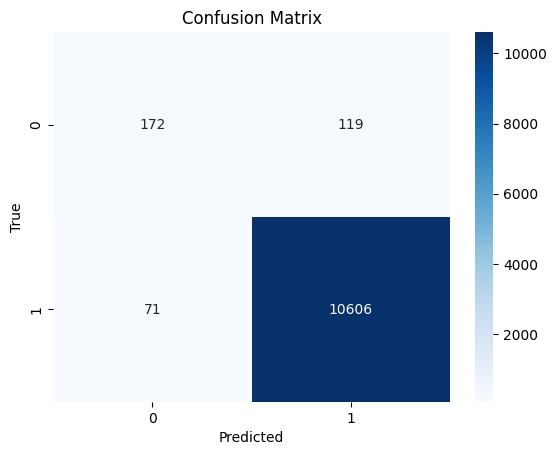

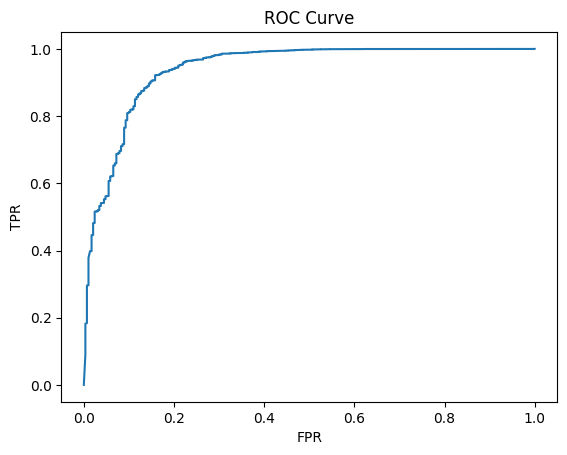

In [6]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.show()

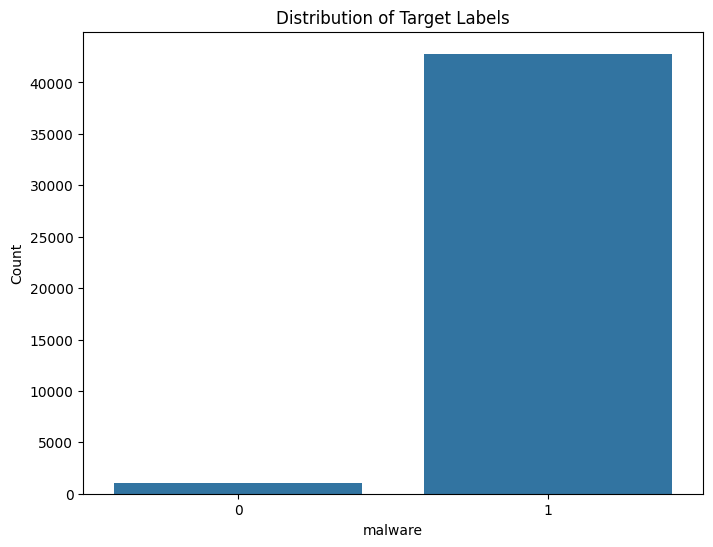

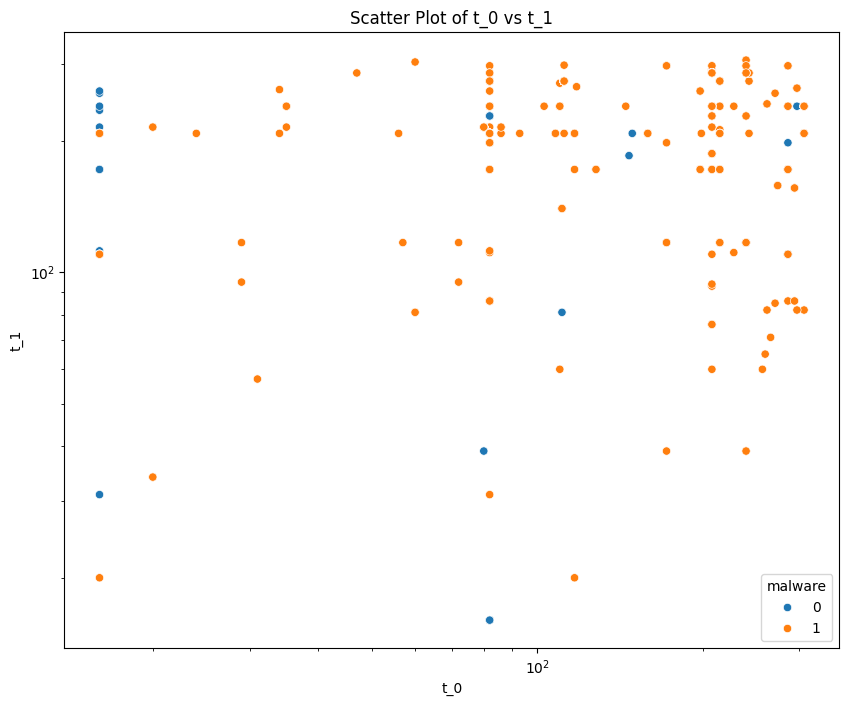

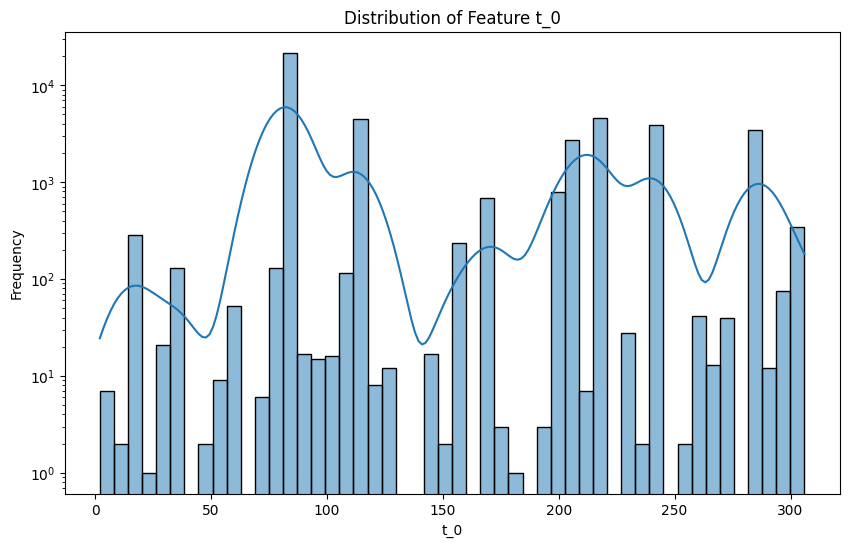

In [7]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
df_copy_for_cluster = df.copy()
df_copy_for_cluster["cluster"] = kmeans.fit_predict(X)

# Bar graph for target label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=df_copy_for_cluster.iloc[:, -2]) # Assuming the last column is the target in df_copy_for_cluster, the second to last is original target
plt.title('Distribution of Target Labels')
plt.xlabel(df_copy_for_cluster.columns[-2]) # Use the actual column name for clarity
plt.ylabel('Count')
plt.show()

# Scatter plot of 't_0' vs 't_1' (example features)
# Using original df before adding 'cluster' to plot with original columns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t_0', y='t_1', hue=df.columns[-1], data=df.sample(n=min(len(df), 5000), random_state=42))
plt.title('Scatter Plot of t_0 vs t_1')
plt.xlabel('t_0')
plt.ylabel('t_1')
plt.xscale('log') # Use log scale as values can vary widely
plt.yscale('log') # Use log scale as values can vary widely
plt.show()

# Histogram for 't_0' column (example feature)
plt.figure(figsize=(10, 6))
sns.histplot(df['t_0'], bins=50, kde=True)
plt.title('Distribution of Feature t_0')
plt.xlabel('t_0')
plt.ylabel('Frequency')
plt.yscale('log') # Use log scale for y-axis to better visualize skewed distributions
plt.show()

In [2]:
df = pd.read_csv("dynamic_api_call_sequence_per_malware_100_0_306.csv")
df = df.drop_duplicates()

# Drop the 'hash' column as it's an identifier
df = df.drop('hash', axis=1)

# Separate features (X) and target (y) dynamically
# Assuming the last column is the target
X = df.iloc[:, :-1] # All columns except the last one are features
y = df.iloc[:, -1]  # The last column is the target

# Convert all feature columns in X to numeric, coercing errors to NaN
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Handle any NaNs that might have been introduced by coercion (e.g., fill with median)
for col in X.columns:
    if X[col].isnull().any():
        X[col] = X[col].fillna(X[col].median())

# Scale the features in X
sc = StandardScaler()
X = sc.fit_transform(X)

# Split the preprocessed X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Data loading and preprocessing complete. X_train, X_test, y_train, y_test are ready.")

/tmp/ipython-input-441458700.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col], errors='coerce')


Data loading and preprocessing complete. X_train, X_test, y_train, y_test are ready.


In [3]:
df = pd.read_csv("dynamic_api_call_sequence_per_malware_100_0_306.csv")
df = df.drop_duplicates()

# Drop the 'hash' column as it's an identifier
df = df.drop('hash', axis=1)

# Separate features (X) and target (y) dynamically
# Assuming the last column is the target
X = df.iloc[:, :-1].copy() # All columns except the last one are features, make a copy to avoid SettingWithCopyWarning
y = df.iloc[:, -1]  # The last column is the target

# Convert all feature columns in X to numeric, coercing errors to NaN
for col in X.columns:
    X.loc[:, col] = pd.to_numeric(X[col], errors='coerce')

# Handle any NaNs that might have been introduced by coercion (e.g., fill with median)
for col in X.columns:
    if X[col].isnull().any():
        X.loc[:, col] = X[col].fillna(X[col].median())

# Scale the features in X
sc = StandardScaler()
X = sc.fit_transform(X)

# Split the preprocessed X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Data loading and preprocessing complete. X_train, X_test, y_train, y_test are ready.")

Data loading and preprocessing complete. X_train, X_test, y_train, y_test are ready.
